In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read in the data
housing = pd.read_csv('data/housing.csv')
schools = pd.read_csv('data/schools.csv')

In [2]:
housing['cooling'] = pd.Categorical(housing['cooling'], categories=['Yes', 'No'], ordered=True)
housing['heating'] = pd.Categorical(housing['heating'], categories=['Yes', 'No'], ordered=True)
housing['fireplace'] = pd.Categorical(housing['fireplace'], categories=['Yes', 'No'], ordered=True)

In [5]:
s_types = ["Elementary", "Middle", "High"]

for s_type in s_types:

    size_col_name = (s_type + "_size").lower()
    rating_col_name = (s_type + "_rating").lower()

    tdf = schools[schools['school'].str.contains(s_type)]
    housing = housing.merge(tdf, left_on=s_type.lower(), right_on='school', how='left')

    housing = housing.rename(columns={'size': size_col_name, 'rating': rating_col_name})


housing.rename(columns={'school_x' : 'elementary', 'school_y' : 'middle', 'school' : 'high'}, inplace=True)

In [6]:
housing.columns

Index(['neighborhood', 'beds', 'baths', 'sqft', 'lotsize', 'year', 'type',
       'levels', 'cooling', 'heating', 'fireplace', 'elementary', 'middle',
       'high', 'soldprice', 'elementary', 'elementary_size',
       'elementary_rating', 'middle', 'middle_size', 'middle_rating', 'high',
       'high_size', 'high_rating'],
      dtype='object')

In [21]:
housing.describe()

,beds,baths,sqft,lotsize,year,soldprice,elementary_size,elementary_rating,middle_size,middle_rating,high_size,high_rating
count,683.000000,683.000000,681.000000,663.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.937042,2.001464,2127.562408,0.288869,1977.461201,1.244857e+06,742.825769,5.746706,693.265007,6.178624,967.423133,5.926794
std,38.121012,1.392269,1069.311206,0.184496,30.280016,3.761917e+05,102.282215,2.404535,120.233272,1.948083,153.084918,2.920837
min,1.000000,1.000000,536.000000,0.070000,1495.000000,6.640000e+02,600.000000,1.000000,500.000000,2.000000,750.000000,1.000000
25%,3.000000,1.000000,1349.000000,0.160000,1961.000000,9.745000e+05,700.000000,4.000000,600.000000,5.000000,850.000000,4.000000
50%,4.000000,1.500000,1955.000000,0.240000,1978.000000,1.267000e+06,750.000000,6.000000,700.000000,7.000000,1000.000000,6.000000
75%,4.000000,2.500000,2676.000000,0.360000,1997.000000,1.548000e+06,800.000000,8.000000,800.000000,8.000000,1100.000000,8.000000
max,999.000000,25.000000,5265.000000,1.300000,2111.000000,2.393000e+06,900.000000,10.000000,900.000000,9.000000,1250.000000,10.000000


In [41]:
housing.corr(numeric_only=True).style.background_gradient(cmap='RdBu_r', axis=None)

,beds,baths,sqft,lotsize,year,soldprice,elementary_size,elementary_rating,middle_size,middle_rating,high_size,high_rating
beds,1.000000,-0.002899,-0.013616,0.615582,-0.024900,-0.047559,-0.018862,0.004865,-0.045632,-0.002652,0.021369,-0.037098
baths,-0.002899,1.000000,0.645553,0.432640,0.029182,0.244756,-0.020519,0.048946,-0.004540,0.007742,0.036170,-0.010430
sqft,-0.013616,0.645553,1.000000,0.659812,0.011090,0.321081,-0.063302,0.017613,-0.003096,0.005502,0.013677,0.015406
lotsize,0.615582,0.432640,0.659812,1.000000,0.012150,0.210934,-0.031056,0.013943,0.004009,-0.004600,-0.041748,-0.016929
year,-0.024900,0.029182,0.011090,0.012150,1.000000,0.315331,0.004171,0.271302,-0.058773,0.348640,-0.011669,0.258779
soldprice,-0.047559,0.244756,0.321081,0.210934,0.315331,1.000000,-0.052409,0.346730,-0.177056,0.440344,0.021606,0.534869
elementary_size,-0.018862,-0.020519,-0.063302,-0.031056,0.004171,-0.052409,1.000000,0.187256,-0.134493,0.011592,-0.262872,-0.061148
elementary_rating,0.004865,0.048946,0.017613,0.013943,0.271302,0.346730,0.187256,1.000000,-0.317063,0.592523,0.017185,0.541839
middle_size,-0.045632,-0.004540,-0.003096,0.004009,-0.058773,-0.177056,-0.134493,-0.317063,1.000000,-0.434005,0.017936,-0.248999
middle_rating,-0.002652,0.007742,0.005502,-0.004600,0.348640,0.440344,0.011592,0.592523,-0.434005,1.000000,-0.022005,0.627978


<AxesSubplot: xlabel='neighborhood', ylabel='soldprice'>

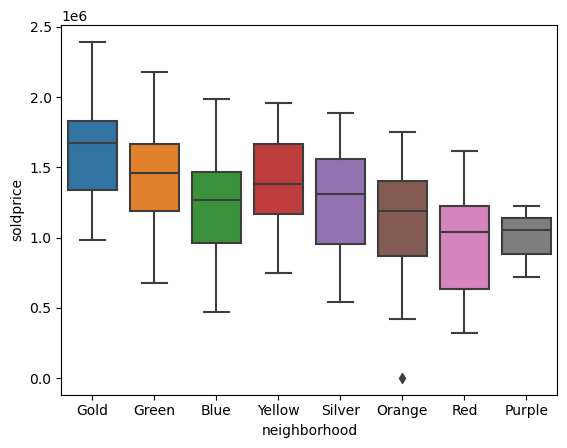

In [7]:
sns.boxplot(x='neighborhood', y='soldprice', data=housing)
plt.show()

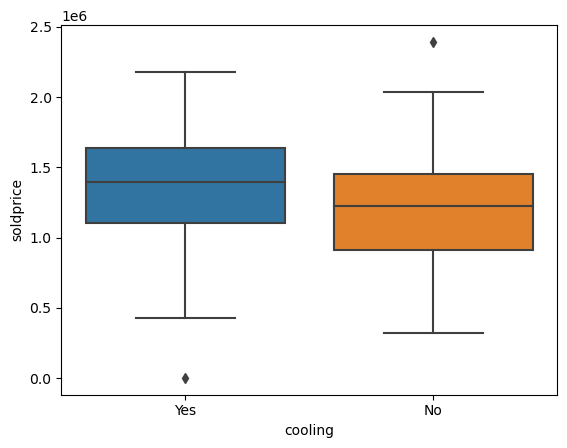

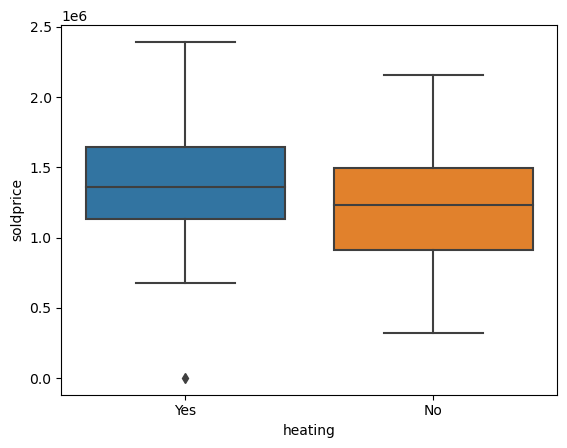

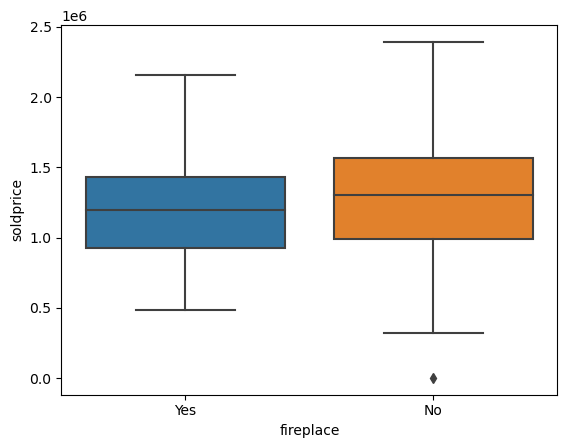

In [13]:
sns.boxplot(x='cooling', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='heating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='fireplace', y='soldprice', data=housing)
plt.show()

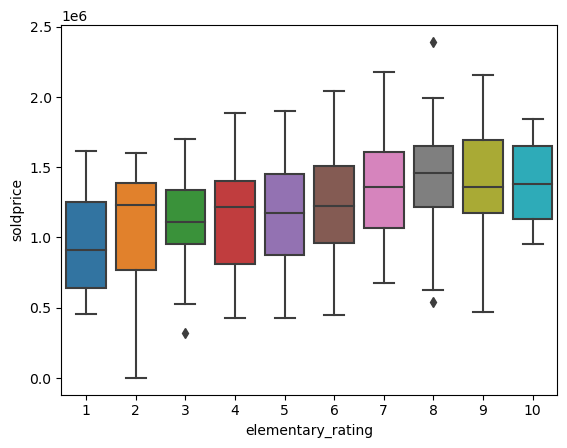

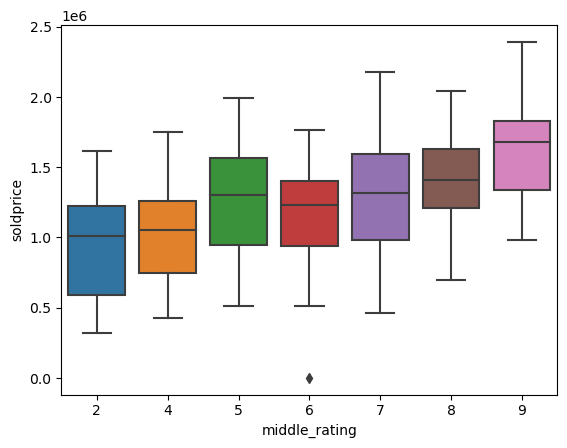

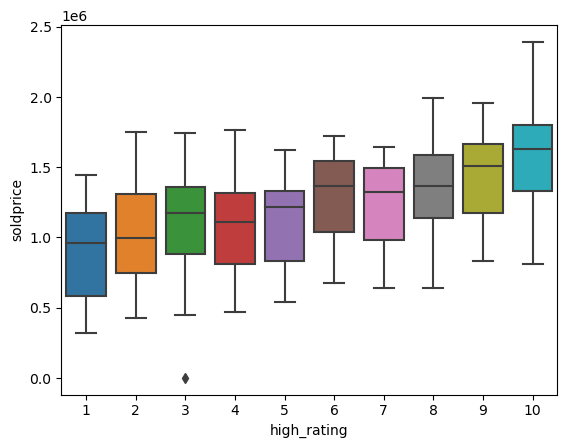

In [12]:
sns.boxplot(x='elementary_rating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='middle_rating', y='soldprice', data=housing)
plt.show()

sns.boxplot(x='high_rating', y='soldprice', data=housing)
plt.show()

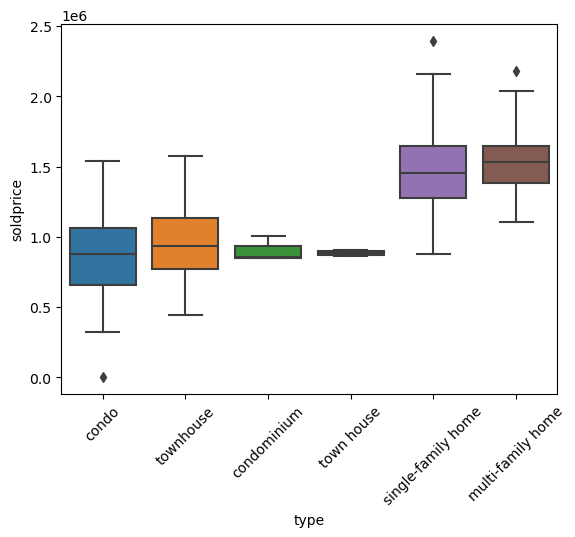

In [30]:
sns.boxplot(x='type', y='soldprice', data=housing.sort_values('soldprice'))
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='levels', ylabel='soldprice'>

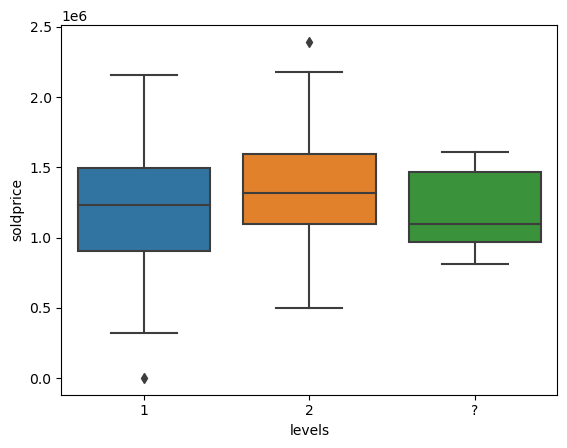

In [18]:
sns.boxplot(x='levels', y='soldprice', data=housing)
plt.show()

<AxesSubplot: xlabel='beds', ylabel='soldprice'>

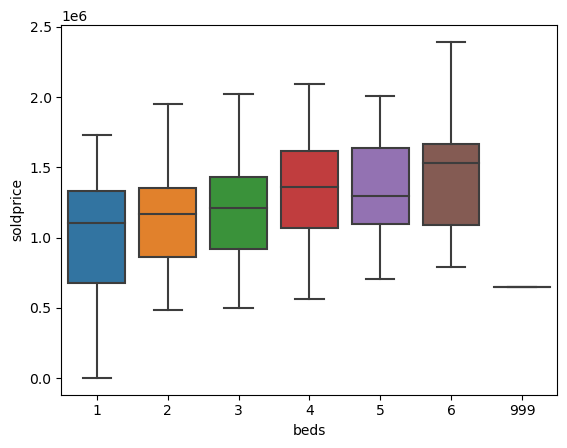

In [20]:
sns.boxplot(x='beds', y='soldprice', data=housing)

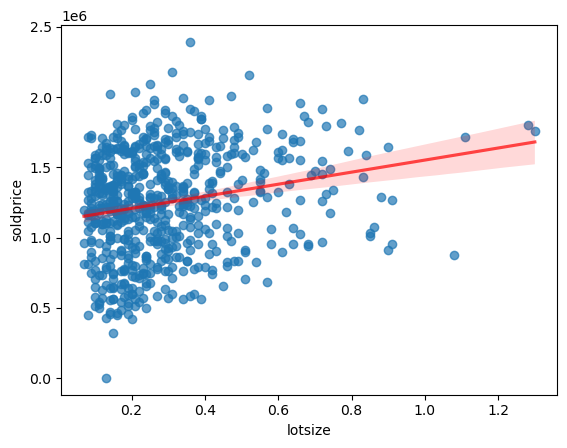

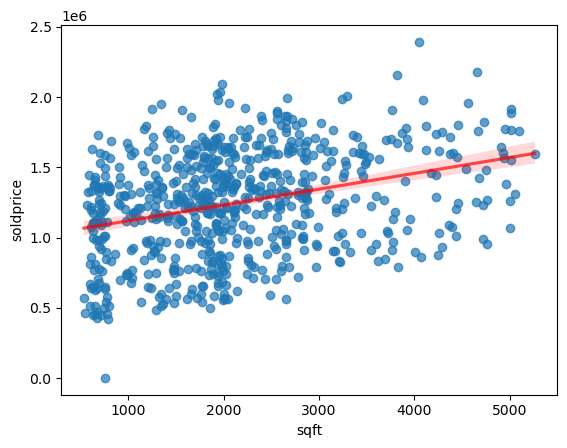

In [39]:
sns.regplot(x='lotsize', y='soldprice', data=housing, scatter_kws={'alpha':0.7},line_kws={'color': 'red', 'alpha': 0.7})
plt.show()

sns.regplot(x='sqft', y='soldprice', data=housing, scatter_kws={'alpha':0.7}, line_kws={'color': 'red', 'alpha': 0.7})
plt.show()

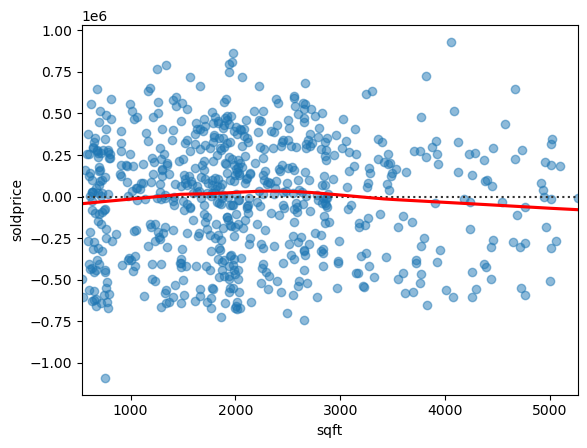

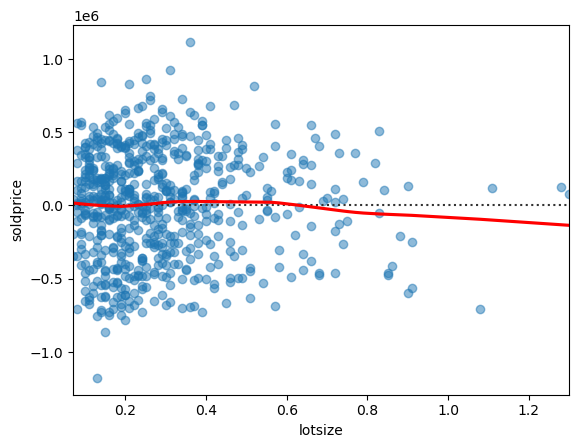

In [31]:
sns.residplot(x='sqft', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

sns.residplot(x='lotsize', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

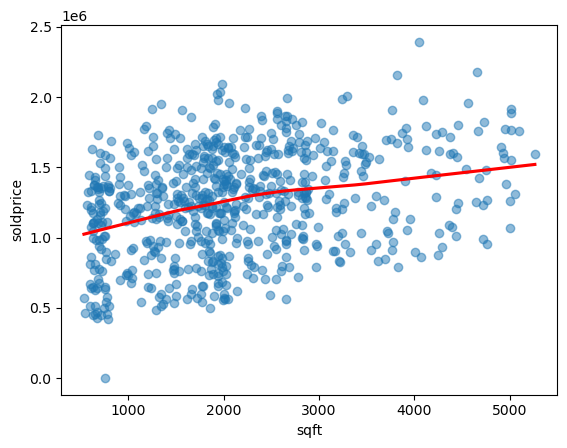

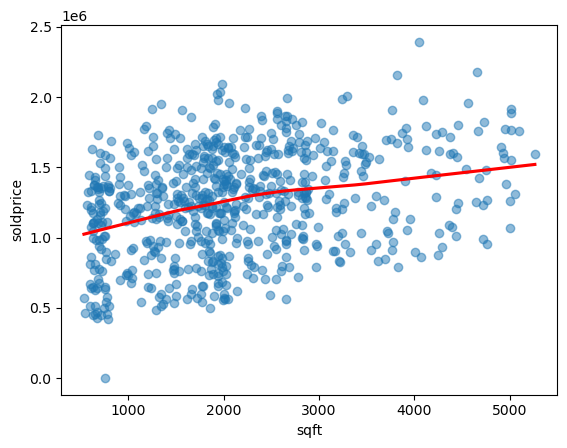

In [48]:
sns.regplot(x='sqft', y='soldprice', data=housing, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

sns.regplot(x='sqft', y='soldprice', data=housing, lowess=True, n_boot=10000,scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()
